<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        BANK MARKETING
    </h2>
    </div>

Citation Request:
  This dataset is public available for research. The details are described in [Moro et al., 2011]. 
  Please include this citation if you plan to use this database:

  [Moro et al., 2011] S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

  Available at: [pdf] http://hdl.handle.net/1822/14838
                [bib] http://www3.dsi.uminho.pt/pcortez/bib/2011-esm-1.txt

1. Title: Bank Marketing

2. Sources
   Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
   
3. Past Usage:

  The full dataset was described and analyzed in:

  S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. 
  In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, 
  Portugal, October, 2011. EUROSIS.

4. Relevant Information:

   The data is related with direct marketing campaigns of a Portuguese banking institution. 
   The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, 
   in order to access if the product (bank term deposit) would be (or not) subscribed. 

   There are two datasets: 
      1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010).
      2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv.
   The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g. SVM).

   The classification goal is to predict if the client will subscribe a term deposit (variable y).

5. Number of Instances: 45211 for bank-full.csv (4521 for bank.csv)

6. Number of Attributes: 16 + output attribute.

7. Attribute information:

   For more information, read [Moro et al., 2011].

   Input variables:
# bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
  # related with the last contact of the current campaign:
   
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  
   10 - day: last contact day of the month (numeric)
  
   11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
   12 - duration: last contact duration, in seconds (numeric)
  
  # other attributes:
  
   13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
   14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means    client was not previously contacted)
  
   15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
   16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

   Output variable (desired target):
  
   17 - y - has the client subscribed a term deposit? (binary: "yes","no")

8. Missing Attribute Values: None

In [1]:
# loading the Basic libraries

import pandas as pd                                     # To work on data manipulation 
import numpy as np                                      # It is used for numerical python
import seaborn as sns                                   # For Visualization
import matplotlib.pyplot as plt                         # For Visualization
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\vijay yadav\Downloads\bank-full.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#shape of the dataset
df.shape

(45211, 17)

In [4]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#description of the numerical dataset 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
#duplicates in the dataset
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


###### There is no duplicates in the dataset

In [7]:
#description of the object datatype
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


# Age

In [8]:
#Distribution of age
distribution_count = df['age'].value_counts()
distribution_count

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64

<Axes: xlabel='age', ylabel='Density'>

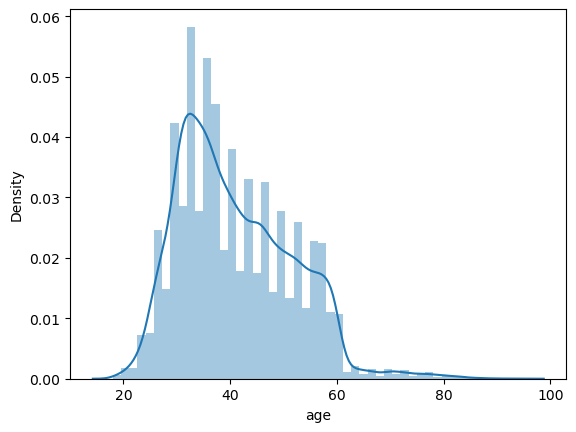

In [9]:
#plotting distribution of the age
sns.distplot(df['age'],kde=True)

In [10]:
df.rename(columns={'y': 'Target'}, inplace=True)

In [11]:
bins = [15, 30, 40, 50, 60, 70, 80, 90, 100] 
labels = ['15-29', '30-39', '40-49', '50-59', '60-69','70-79','80-89','90-99']

df['Age Group'] = pd.cut(df.age, bins=bins, labels=labels, right=False)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age Group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-59
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-49
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-39
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-49
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,50-59
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,70-79
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,70-79
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,50-59


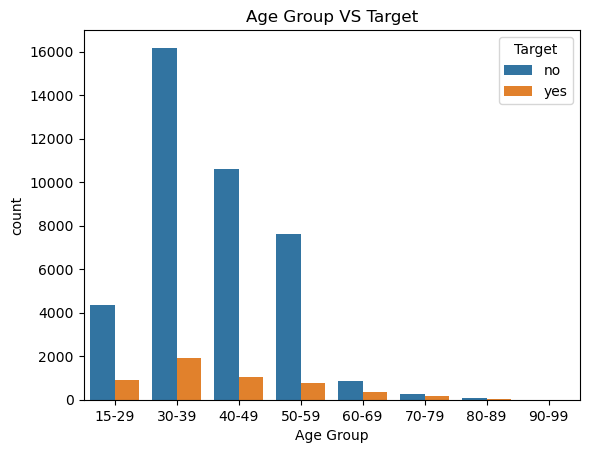

In [12]:
sns.countplot(x='Age Group', hue='Target',data=df)
plt.title('Age Group VS Target')
plt.show()

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age Group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-59
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-49
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-39
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-49
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30-39


# Job

In [14]:
#job counts
distribution_job = df['job'].value_counts()
distribution_job

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

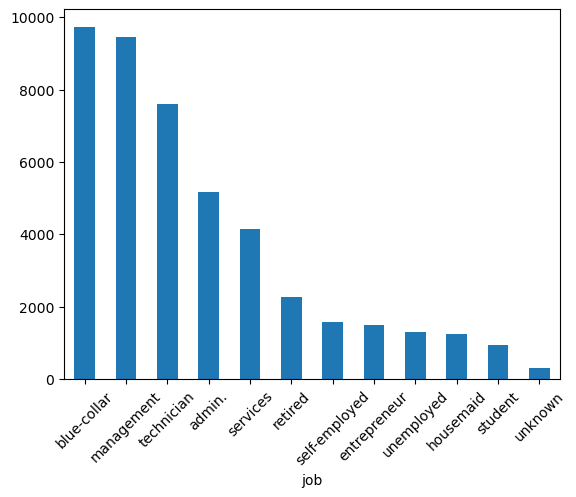

In [15]:
#plotting the barplot for job counts
distribution_job_ = df['job'].value_counts().plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

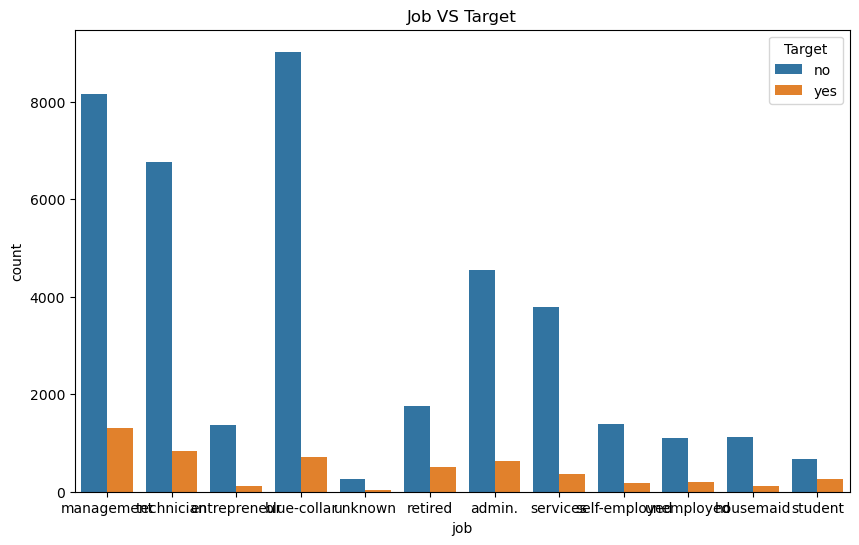

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='Target',data=df)
plt.title('Job VS Target')
plt.show()

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age Group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-59
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-49
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-39
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-49
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30-39


In [18]:
#Finding the balance vs job category
job_balance = round(df.groupby('job')['balance'].mean(),2)
job_balance

job
admin.           1135.84
blue-collar      1078.83
entrepreneur     1521.47
housemaid        1392.40
management       1763.62
retired          1984.22
self-employed    1647.97
services          997.09
student          1388.06
technician       1252.63
unemployed       1521.75
unknown          1772.36
Name: balance, dtype: float64

In [19]:
#Job status according to the marital status
job_status_marital=df.groupby(['job'])['marital'].value_counts()
job_status_marital

job            marital 
admin.         married     2693
               single      1728
               divorced     750
blue-collar    married     6968
               single      2014
               divorced     750
entrepreneur   married     1070
               single       238
               divorced     179
housemaid      married      912
               divorced     184
               single       144
management     married     5400
               single      2947
               divorced    1111
retired        married     1731
               divorced     425
               single       108
self-employed  married      993
               single       446
               divorced     140
services       married     2407
               single      1198
               divorced     549
student        single       878
               married       54
               divorced       6
technician     married     4052
               single      2620
               divorced     925
unemployed     m

In [20]:
#job status according to the education qualification.
job_status_educn = df.groupby('job')['education'].value_counts()
job_status_educn

job            education
admin.         secondary    4219
               tertiary      572
               primary       209
               unknown       171
blue-collar    secondary    5371
               primary      3758
               unknown       454
               tertiary      149
entrepreneur   tertiary      686
               secondary     542
               primary       183
               unknown        76
housemaid      primary       627
               secondary     395
               tertiary      173
               unknown        45
management     tertiary     7801
               secondary    1121
               primary       294
               unknown       242
retired        secondary     984
               primary       795
               tertiary      366
               unknown       119
self-employed  tertiary      833
               secondary     577
               primary       130
               unknown        39
services       secondary    3457
               pri

In [21]:
#job description by default.
job_credit_default = df.groupby('job')['default'].value_counts()
job_credit_default

job            default
admin.         no         5097
               yes          74
blue-collar    no         9531
               yes         201
entrepreneur   no         1432
               yes          55
housemaid      no         1218
               yes          22
management     no         9294
               yes         164
retired        no         2238
               yes          26
self-employed  no         1546
               yes          33
services       no         4079
               yes          75
student        no          935
               yes           3
technician     no         7467
               yes         130
unemployed     no         1273
               yes          30
unknown        no          286
               yes           2
Name: count, dtype: int64

In [22]:
#job counts by using the housing 
job_housing = df.groupby('job')['housing'].value_counts()
job_housing

job            housing
admin.         yes        3182
               no         1989
blue-collar    yes        7048
               no         2684
entrepreneur   yes         869
               no          618
housemaid      no          842
               yes         398
management     no         4780
               yes        4678
retired        no         1773
               yes         491
self-employed  no          814
               yes         765
services       yes        2766
               no         1388
student        no          689
               yes         249
technician     yes        4115
               no         3482
unemployed     no          760
               yes         543
unknown        no          262
               yes          26
Name: count, dtype: int64

## Marital

In [23]:
#marital status 
df['marital'].value_counts()

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

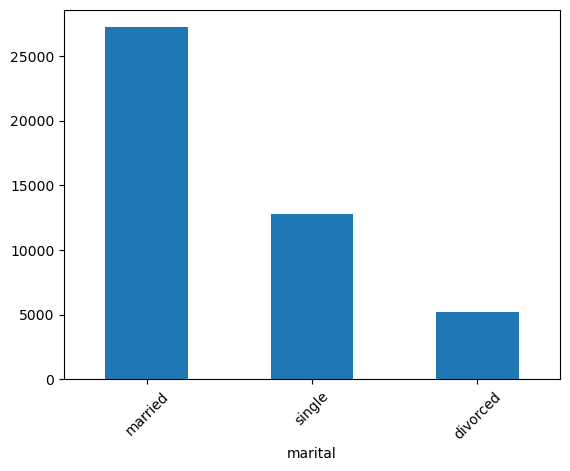

In [24]:
#plotting the marital status
df['marital'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [25]:
#categorising the marital status by target variable i.e y.
df.groupby('marital')['Target'].value_counts()

marital   Target
divorced  no         4585
          yes         622
married   no        24459
          yes        2755
single    no        10878
          yes        1912
Name: count, dtype: int64

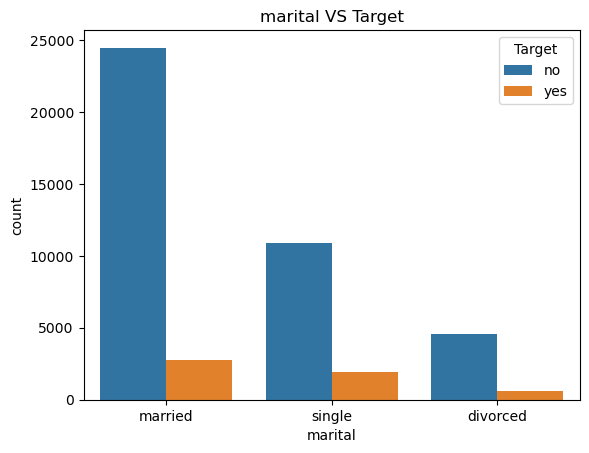

In [26]:
sns.countplot(x='marital', hue='Target',data=df)
plt.title('marital VS Target')
plt.show()

In [27]:
#average balance of marital status
mar_balance =df.groupby('marital')['balance'].mean()
mar_balance

marital
divorced    1178.872287
married     1425.925590
single      1301.497654
Name: balance, dtype: float64

## Education

In [28]:
#finding the count of values for education.
education_count = df['education'].value_counts()
education_count

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

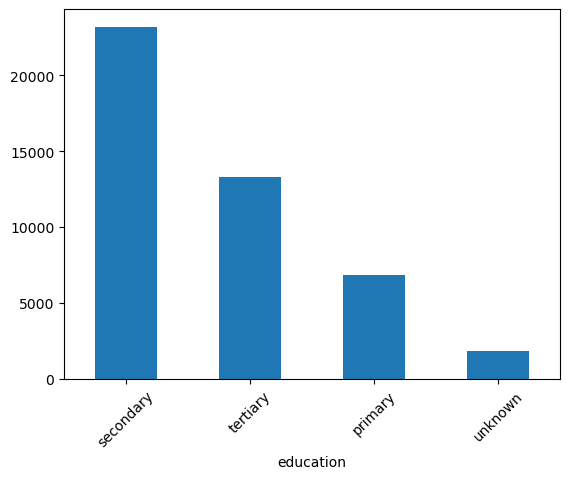

In [29]:
#plotting the education count using bar plot
education_count_vis = education_count.plot(kind='bar')
plt.xticks(rotation = 45)
plt.show()

In [30]:
#grouping the education by the target variable i.e y.
edu_y = df.groupby('education')['Target'].value_counts()
edu_y

education  Target
primary    no         6260
           yes         591
secondary  no        20752
           yes        2450
tertiary   no        11305
           yes        1996
unknown    no         1605
           yes         252
Name: count, dtype: int64

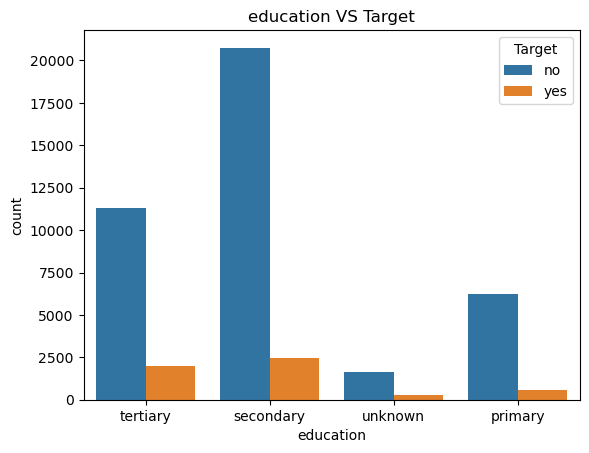

In [31]:
sns.countplot(x='education', hue='Target',data=df)
plt.title('education VS Target')
plt.show()

In [32]:
#grouping the education by the default 
educ_def = df.groupby('education')['default'].value_counts()
educ_def

education  default
primary    no          6724
           yes          127
secondary  no         22744
           yes          458
tertiary   no         13103
           yes          198
unknown    no          1825
           yes           32
Name: count, dtype: int64

In [33]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age Group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-59


In [34]:
#average balance of a different stage of educated
educ_bal = df.groupby('education')['balance'].mean()
educ_bal

education
primary      1250.949934
secondary    1154.880786
tertiary     1758.416435
unknown      1526.754443
Name: balance, dtype: float64

## Default

In [35]:
#calculating the value counts in the default category
default_count = df.default.value_counts()
default_count

default
no     44396
yes      815
Name: count, dtype: int64

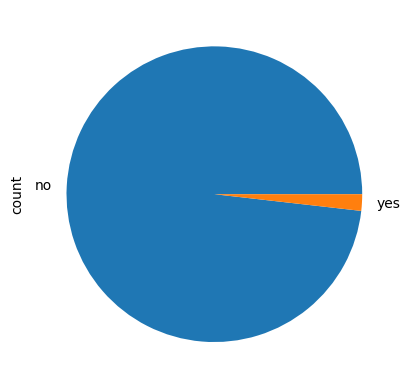

In [36]:
#plotting the default category by count
default_plo = default_count.plot(kind='pie')
plt.xticks(rotation = 0)
plt.show()

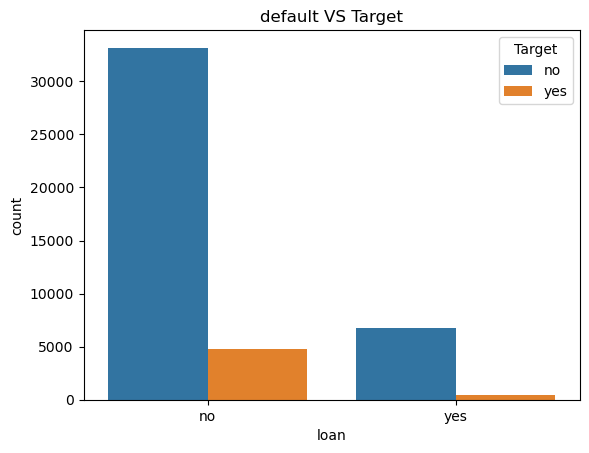

In [37]:
sns.countplot(x='loan', hue='Target',data=df)
plt.title('default VS Target')
plt.show()

In [38]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,Age Group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-59
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-49
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-39
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-49
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,30-39


In [39]:
month_count = df.month.value_counts().sort_values(ascending=False)
month_count

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

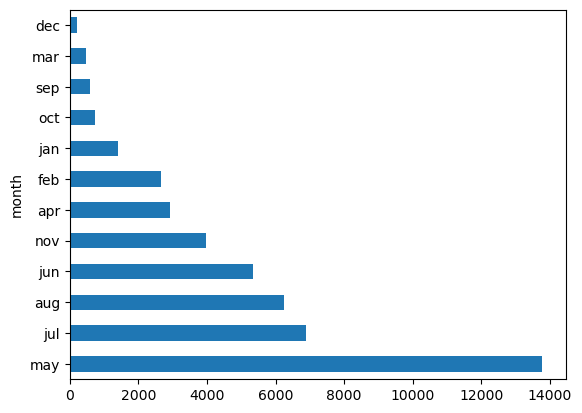

In [40]:
month_plo = month_count.plot(kind='barh')
plt.xticks(rotation = 0)
plt.show()

In [41]:
df['Target'] = df.Target.replace({'yes':1,'no':0})

In [42]:
# We have an age column so here we drop the Age group column
df.drop(columns='Age Group',inplace=True)

In [43]:
cat_col =df.describe(include='object')
cat_col

,job,marital,education,default,housing,loan,contact,month,poutcome
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959


In [44]:
num_col =df.describe(exclude='object')
num_col

,age,balance,day,duration,campaign,pdays,previous,Target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [45]:
from sklearn.preprocessing import OrdinalEncoder

for column in cat_col:
    o_encoder = OrdinalEncoder()
    df[[column]] = o_encoder.fit_transform(df[[column]])


In [46]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0,0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0,0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0,0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0,0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0,0


<Axes: >

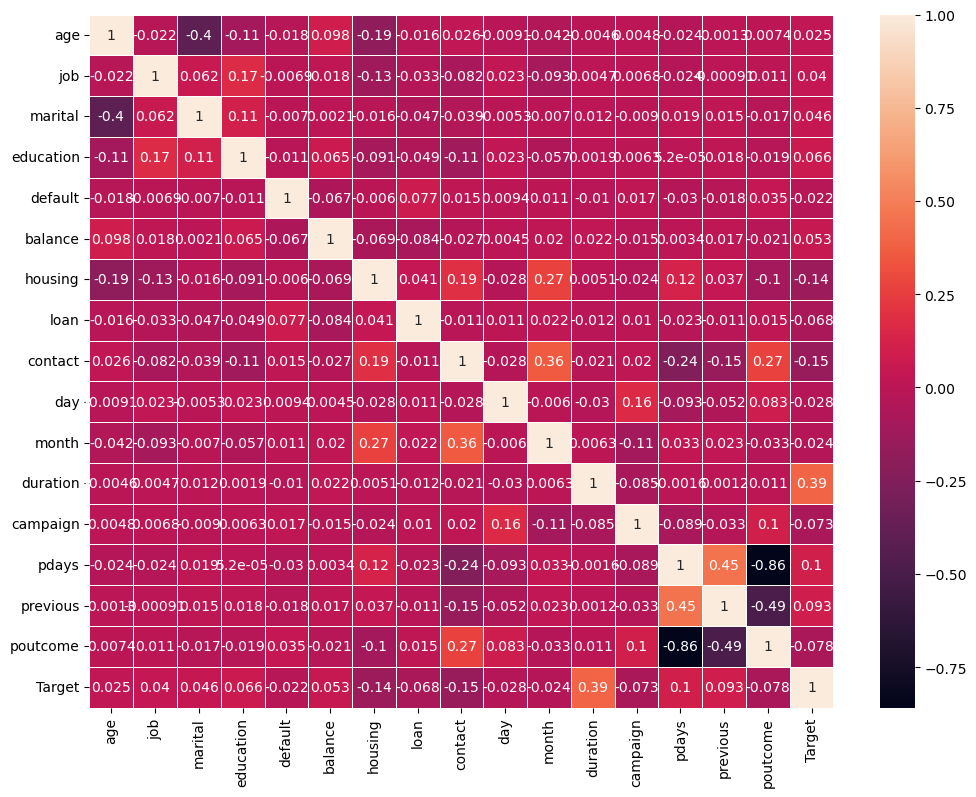

In [47]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot = True,linewidth=.5)

In [48]:
X =df.drop(['Target'],axis=1)
y =df['Target']

In [49]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4.0,1.0,2.0,0.0,2143,1.0,0.0,2.0,5,8.0,261,1,-1,0,3.0
1,44,9.0,2.0,1.0,0.0,29,1.0,0.0,2.0,5,8.0,151,1,-1,0,3.0
2,33,2.0,1.0,1.0,0.0,2,1.0,1.0,2.0,5,8.0,76,1,-1,0,3.0
3,47,1.0,1.0,3.0,0.0,1506,1.0,0.0,2.0,5,8.0,92,1,-1,0,3.0
4,33,11.0,2.0,3.0,0.0,1,0.0,0.0,2.0,5,8.0,198,1,-1,0,3.0


In [50]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int64

### Here we split the data into train and test.

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Scalling the Data

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [53]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1.615199,-0.105861,-0.275222,-1.640552,-0.135068,-0.113928,-1.119920,-0.437589,1.517267,0.262633,1.154713,-0.203987,-0.570356,-0.411081,-0.237323,0.445004
1,1.331720,-1.023550,-0.275222,2.381958,-0.135068,-0.378791,-1.119920,-0.437589,-0.712346,0.623538,-1.508470,-0.347897,-0.244525,-0.411081,-0.237323,0.445004
2,0.859255,-1.329447,-0.275222,-0.299715,-0.135068,-0.390670,0.892921,-0.437589,1.517267,-1.060688,0.821815,-0.161203,-0.244525,-0.411081,-0.237323,0.445004
3,0.197803,-0.105861,-0.275222,-1.640552,-0.135068,0.161850,0.892921,-0.437589,-0.712346,0.142331,-0.176879,-0.756291,1.058799,-0.411081,-0.237323,0.445004
4,1.142734,1.423621,-1.913974,1.041122,-0.135068,-0.233999,0.892921,-0.437589,1.517267,0.022029,0.821815,0.990079,1.058799,-0.411081,-0.237323,0.445004


### Model Building

### DECISION TREE CLASSIFIER

In [54]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
ytrain_dt_pred = model2.predict(X_train)
ytrain_dt_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [56]:
y_dt_pred = model2.predict(X_test)
y_dt_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [58]:
# Model Evaluation

train_score = model2.score(X_train,y_train)
test_score = model2.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 1.0, Testing Score 0.87


**We get accuracy 100% in training and around 87% in testing which is quite overfitted model we say that**

**Pruning the Tree**

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree Classifier with constraints
clf = DecisionTreeClassifier(
    max_depth=5,                # Limit tree depth
    min_samples_split=10,       # Minimum samples to split a node
    min_samples_leaf=5,         # Minimum samples at leaf node
    max_features='sqrt',        # Reduce features considered at each split
    random_state=42
)

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
test_accuracy = accuracy_score(y_test, clf.predict(X_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.8921145764211458
Testing Accuracy: 0.8841092557779497


**Here we get better accuracy as per the previous model**

**Now we can apply some hyperparameters to tune the model to overcome this overfitting problem.**

In [61]:
# the hyperparameters to tune
param_grid = {
    'criterion': ['gini', 'entropy'],       # Split criterion
    'max_depth': [3, 5, 15, None],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples at a leaf node
}

In [62]:
from sklearn.model_selection import GridSearchCV
# Perform Grid Search with Cross-Validation
dt = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [63]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [64]:
model1 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_leaf=2,min_samples_split=10)
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10)

In [65]:
ytrain_dt_pred = model1.predict(X_train)
ytrain_dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
y_dt_pred = model1.predict(X_test)
y_dt_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
# Model Evaluation

train_score = model1.score(X_train,y_train)
test_score = model1.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.9, Testing Score 0.89


**The model achieves 90% training accuracy and 89% testing accuracy, showing a minimal gap and improved generalization. Hyperparameter tuning has enhanced performance, reducing overfitting.**